# Unsupervised Learning

- [`sklearn` Unsupervised Learning](https://scikit-learn.org/stable/unsupervised_learning.html)

In [1]:
# basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# machine Learning
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity
from sklearn.ensemble import IsolationForest

## Dimension Reduction

- [`sklearn` PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [2]:
X, _ = make_blobs(
    n_samples=500,
    centers=4,
    n_features=50,
    cluster_std=5,
    random_state=42,
)
X

array([[  5.47268545,   2.36711978,  -7.72797716, ...,  11.56267621,
          5.3875766 ,   8.30440778],
       [  1.85492413,   4.18350251,   4.24293671, ...,   6.95231996,
         -0.14559701,  -1.61552343],
       [ -4.83822547,   8.26009757,   4.27014101, ...,   1.90689712,
          1.85337817,   7.16225743],
       ...,
       [ 22.32156843,   7.59791014,  11.85630655, ...,  -7.07516877,
        -14.93508452,  -5.03480831],
       [  6.99270309, -11.19575062,  -3.5367364 , ...,   7.54436995,
         17.31625101,   0.1853057 ],
       [-13.91218603,   0.6172048 ,  -4.80263491, ...,  -7.4577458 ,
         -8.18493172,  -4.08366717]])

In [3]:
X.shape

(500, 50)

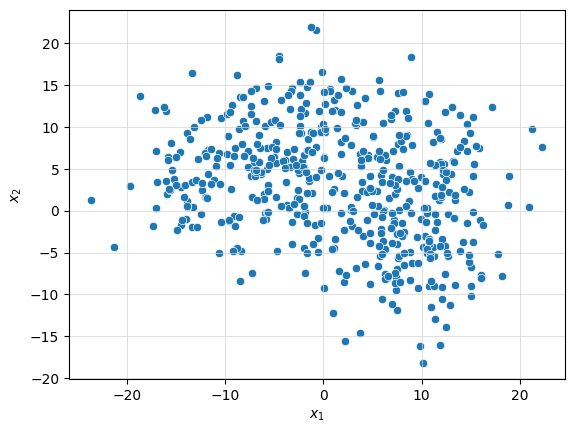

In [4]:
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

In [5]:
pca = PCA(n_components=0.95)
_ = pca.fit(X)
X_pca = pca.transform(X)
X_pca

array([[-21.0132157 ,   0.58429056, -18.78127557, ...,  -2.3284374 ,
          4.5934422 ,   1.99453773],
       [ -8.29402824,  41.09833267,  20.51146456, ...,   3.52188279,
          1.72419453,   8.4908958 ],
       [ -6.5519595 ,  30.98821707,   9.65805067, ...,   1.66649184,
          0.76117725,  -0.12380499],
       ...,
       [-14.29741386, -37.31812582,  36.25339557, ...,  -0.04906407,
         -1.02038831,  -1.06199706],
       [-20.74836199,   2.01953335, -37.94579109, ...,  -5.89788489,
         -0.39341484,  -1.66976959],
       [ 43.92071368,  -2.57280644,  -8.61724191, ...,   3.91991549,
          2.58609615,  -3.17163463]])

In [6]:
X_pca.shape

(500, 42)

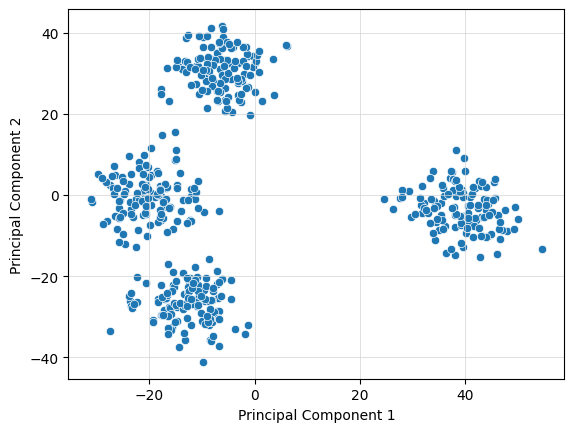

In [7]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

## Clustering

- [`sklearn` Clustering](https://scikit-learn.org/stable/modules/clustering.html)

### K-Means

- [`sklearn` K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


To fit $K$-Means, minimize the *cost* function, otherwise known as the **within cluster sum of squares**:

$$
C(\boldsymbol x_i, \boldsymbol\mu_1, \ldots, \boldsymbol\mu_K, \boldsymbol r_1, \ldots, \boldsymbol r_K) = 
\sum_{i = 1}^{n}\sum_{k = 1}^{K} r_{ik} || \boldsymbol x_i -  \boldsymbol\mu_k || ^ 2
$$

The *responsibilities*, $r_{ik}$, are defined as:

$$
r_{ik} = 
\begin{cases} 
1 & \text{if } \boldsymbol x_i \text{ is closest to }  \boldsymbol\mu_k\\
0 & \text{otherwise}
\end{cases}
$$

This means that $r_{ik}$ is 1 if the center of cluster $k$ is the closest to data point $x_i$, and 0 otherwise.

Assuming $\boldsymbol x_i$ is a $p$-dimensional vector, we have:

$$
|| \boldsymbol x_i -  \boldsymbol\mu_k || ^ 2 = 
(x_{i1} - \mu_{k1}) ^ 2 + \ldots + (x_{ip} - \mu_{kp}) ^ 2.
$$

This quantity is the squared Euclidean distance (also known as the L2 norm) between data point $\boldsymbol x_i$ and the center of cluster $k$, $\boldsymbol\mu_k$. It measures the "closeness" of $\boldsymbol x_i$ to $\boldsymbol \mu_k$. The goal of $K$-Means is to minimize this distance for all data points and their assigned clusters, hence minimizing the within cluster sum of squares.

This is easy! Simply... assign each data point to its own cluster! But that is silly and useless. So instead, we will use the [Expectation–Maximization (EM) Algorithm](https://en.m.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) to fit $K$-Means, *after first choosing a value of $K$*.

To perform $K$-Means, first choose $K$, the number of clusters to learn. Initialize a random center for each cluster. 

**EM Algorithm for $K$-Means**

1. Pre-select a value of $K$, then number of clusters to learn.
2. Randomly initialize a center for each cluster.
3. Repeat the **E** and **M** steps until convergence.
    - **E-Step**: Update the responsibilities. That is, assign each data point to the cluster that has the closest center.
    $$
    r_{ik} = 
    \begin{cases} 
    1 & \text{if } \boldsymbol x_i \text{ is closest to }  \boldsymbol\mu_k\\
    0 & \text{otherwise}
    \end{cases}
    $$
    - If there are no updates to the responsibilities, the algorithm has converged.
    -  **M-Step**: Update the cluster centers $\boldsymbol \mu_k$ by calculating the mean of all data points assigned to cluster $k$.
    $$
    \mu_k = \frac{\sum_{i=1}^n r_{ik} \boldsymbol x_i}{\sum_{i=1}^n r_{ik}}
    $$

Because of the random initialization, $K$-Means is often by default run multiples times, and the "best" outcome (the outcome with the lowest cost) is chosen.

In [8]:
X, _ = make_blobs(
    n_samples=500,
    n_features=2,
    cluster_std=1,
    random_state=3,
)

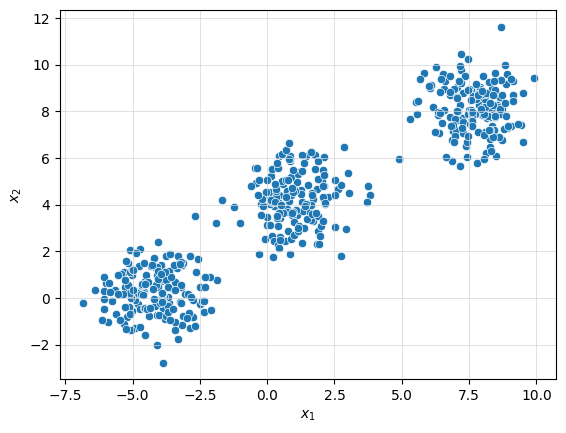

In [9]:
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

In [10]:
km = KMeans()
_ = km.fit(X)
clusters = km.predict(X)
clusters

array([4, 3, 0, 1, 4, 5, 4, 0, 4, 0, 6, 4, 4, 5, 4, 0, 0, 0, 2, 5, 3, 3,
       0, 0, 2, 4, 5, 1, 2, 6, 3, 0, 6, 6, 3, 7, 6, 0, 2, 2, 5, 5, 5, 0,
       3, 1, 1, 2, 0, 1, 0, 0, 0, 4, 1, 4, 4, 3, 4, 3, 0, 4, 2, 4, 6, 5,
       5, 2, 1, 2, 7, 7, 0, 4, 3, 3, 0, 6, 6, 6, 4, 2, 6, 0, 5, 3, 3, 6,
       4, 3, 5, 0, 4, 5, 0, 1, 2, 1, 6, 0, 4, 4, 1, 7, 0, 0, 2, 4, 4, 1,
       6, 4, 3, 2, 5, 2, 5, 5, 1, 4, 2, 5, 2, 5, 0, 2, 5, 2, 1, 0, 2, 4,
       4, 0, 2, 3, 2, 5, 1, 5, 0, 5, 4, 2, 0, 2, 6, 5, 0, 1, 4, 5, 3, 1,
       5, 4, 4, 6, 4, 5, 6, 4, 6, 5, 6, 6, 6, 2, 2, 7, 2, 7, 5, 4, 1, 2,
       4, 0, 2, 6, 2, 0, 3, 2, 3, 0, 1, 6, 5, 0, 5, 3, 0, 5, 4, 2, 4, 3,
       3, 0, 2, 2, 5, 5, 0, 2, 2, 5, 6, 7, 5, 5, 2, 2, 7, 5, 4, 3, 5, 1,
       5, 6, 2, 6, 3, 0, 2, 6, 0, 1, 0, 4, 7, 3, 6, 2, 4, 2, 0, 1, 3, 1,
       4, 2, 4, 2, 0, 2, 2, 5, 0, 0, 0, 3, 4, 5, 1, 0, 5, 6, 4, 4, 4, 5,
       5, 4, 6, 3, 1, 0, 1, 0, 5, 4, 2, 7, 0, 0, 0, 4, 1, 5, 0, 4, 1, 5,
       0, 6, 6, 5, 7, 4, 4, 4, 6, 0, 7, 3, 4, 5, 1,

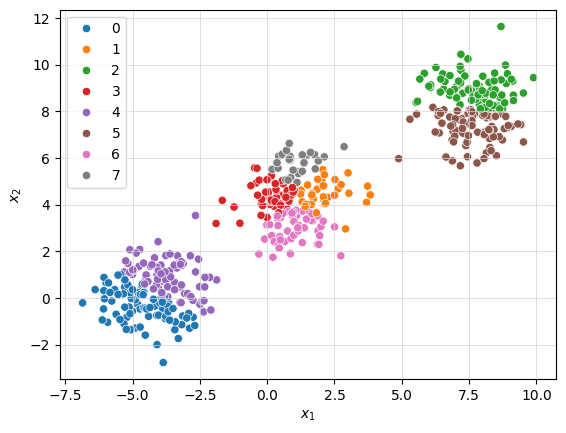

In [11]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pd.Categorical(clusters))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

In [12]:
km3 = KMeans(n_clusters=3)
km3.fit(X)
clusters = km3.predict(X)
clusters

array([0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2,
       0, 0, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0,
       2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 1,
       1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2,
       0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2,
       2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0,
       0, 0, 1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2,
       1, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1,
       0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2,
       2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2,
       1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1,
       1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1,
       0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2,

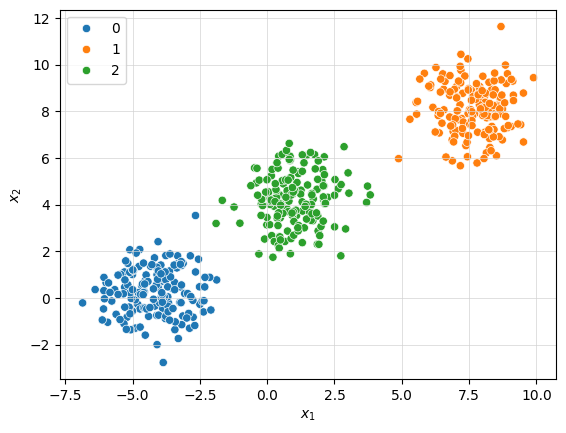

In [13]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pd.Categorical(clusters))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

In [14]:
# check center of each learned cluster
km3.cluster_centers_

array([[-4.18726897,  0.27543154],
       [ 7.67197216,  8.11134342],
       [ 1.01450711,  4.20318963]])

In [15]:
# check cost
km3.inertia_

1005.8251148922157

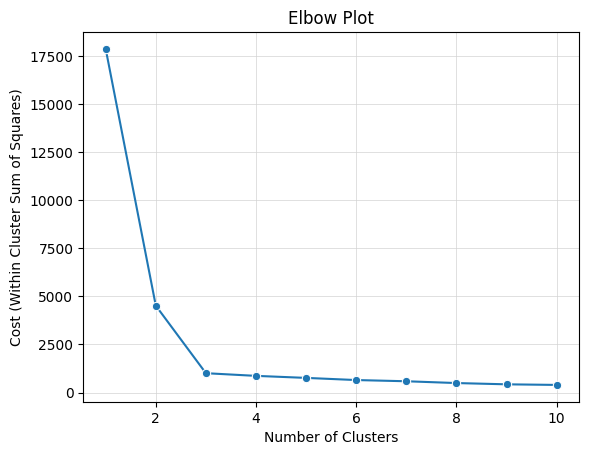

In [16]:
cost = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    cost.append(kmeans.inertia_)

sns.lineplot(x=range(1, 11), y=cost, marker="o")
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Cost (Within Cluster Sum of Squares)")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

### Alternative Clustering Methods

- [`sklearn` Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
- [`sklearn` DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [17]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
clusters

array([ 0,  1,  0, -1,  0,  2,  0,  0,  0,  0,  1,  0,  0,  2,  0,  0,  0,
        0, -1,  2,  1,  1,  0,  0,  2,  0,  2,  1,  2,  1, -1,  0,  1,  1,
       -1,  1,  1,  0,  2,  2,  2,  2,  2,  0,  1,  1,  1,  2,  0,  1,  0,
        0,  0,  0,  1,  3, -1,  1,  0,  1,  0,  0,  2,  0,  1,  2,  2, -1,
        1,  2,  1,  1,  0,  0, -1, -1,  0,  1,  1,  1,  0, -1,  1,  0, -1,
        1, -1,  1,  0,  1,  2,  0,  3,  2,  0,  1,  2,  1,  1,  0,  0, -1,
        1,  1,  0,  0,  2,  0,  0,  1,  1,  0,  1,  2,  2,  2,  2,  2,  1,
        3,  2,  2,  2,  2,  0,  2,  2,  2,  1,  0,  2,  0,  0,  0,  2,  1,
        2,  2,  1,  2,  0,  2,  0,  2,  0,  2, -1,  2,  0, -1,  0,  2,  1,
        1,  2,  0,  0,  1,  0,  2,  1,  0,  1,  2,  1,  1,  1,  2,  2,  1,
       -1,  1,  2,  0,  1,  2,  3,  0,  2,  1,  2,  0,  1,  2,  1,  0,  1,
        1,  2,  0,  2,  1, -1, -1,  0,  2,  0,  1,  1,  0,  2,  2,  2,  2,
        0,  2,  2, -1,  1,  1,  2,  2,  2,  2,  1,  2,  3,  1, -1,  1,  2,
        1,  2,  1,  1,  0

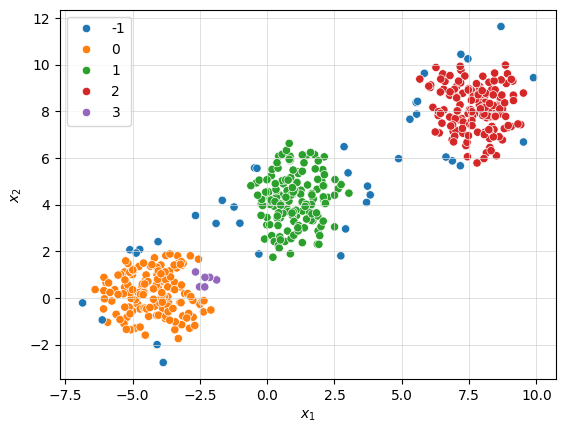

In [18]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pd.Categorical(clusters))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

In [19]:
ac = AgglomerativeClustering()
clusters = ac.fit_predict(X)
clusters

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

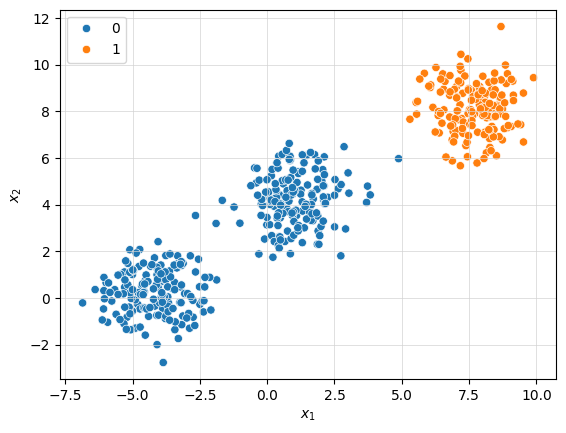

In [20]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pd.Categorical(clusters))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

In [21]:
ac = AgglomerativeClustering(n_clusters=3)
clusters = ac.fit_predict(X)
clusters

array([1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2,
       1, 1, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 0,
       0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2,
       1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 2,
       2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1,
       1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 2, 2,
       0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0,
       1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2,
       2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2,
       0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0,
       0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2,

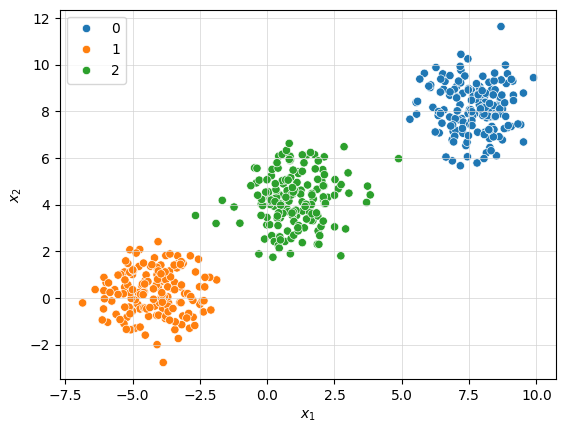

In [22]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pd.Categorical(clusters))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

## Density Estimation

- [`sklearn` Density Estimation](https://scikit-learn.org/stable/modules/density.html)
    - [`sklearn` Kernel Density Estimation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html)
    - [`sklearn` Gaussian Mixture Models](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.sample)

In [23]:
X, _ = make_blobs(
    n_samples=250,
    centers=2,
    n_features=1,
    cluster_std=[1.5, 3],
    random_state=42,
)
X

array([[-2.78768609],
       [ 6.09024112],
       [-1.62891198],
       [ 9.6636619 ],
       [-3.00069084],
       [-2.50152744],
       [-1.9456506 ],
       [10.69663971],
       [-1.90312134],
       [-3.56227726],
       [-3.28660295],
       [ 9.31324022],
       [-2.02307167],
       [ 4.17613851],
       [10.96845988],
       [-0.47483758],
       [-3.76802391],
       [12.17569228],
       [ 6.69581048],
       [10.43578489],
       [-2.54896844],
       [-3.47687725],
       [-3.52458062],
       [-5.15375786],
       [ 8.01078242],
       [-2.3635813 ],
       [-1.38129807],
       [ 4.46974445],
       [ 9.5681877 ],
       [-2.37155646],
       [ 9.89350355],
       [-4.0284443 ],
       [-2.86107832],
       [ 8.04810158],
       [11.45483778],
       [-3.71261353],
       [-6.43881528],
       [ 6.56685527],
       [-2.14625422],
       [-1.73929647],
       [ 9.69666593],
       [14.61160966],
       [-4.09576402],
       [10.17023827],
       [-1.35804553],
       [12

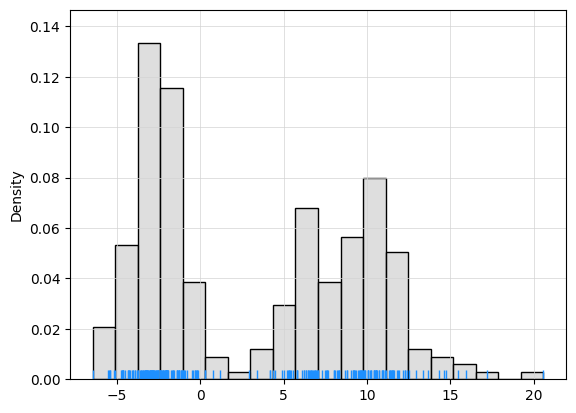

In [24]:
sns.histplot(X.ravel(), bins=20, stat="density", color="lightgrey")
sns.rugplot(X.ravel(), color="dodgerblue")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

In [25]:
kde = KernelDensity(bandwidth=1)
_ = kde.fit(X)

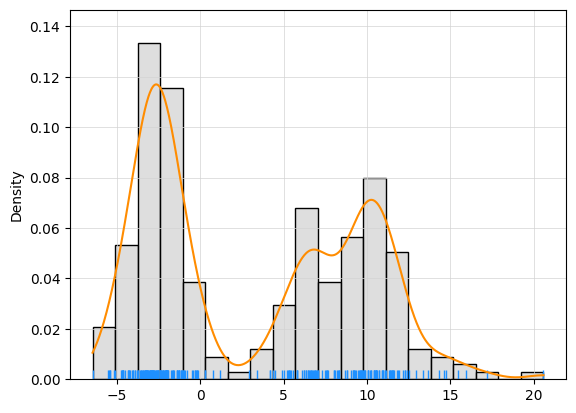

In [26]:
# get pdf values for the plot x values
x = np.linspace(X.min(), X.max(), 1000)
logprob = kde.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)

# create plot
sns.histplot(X.ravel(), bins=20, stat="density", color="lightgrey")
sns.rugplot(X.ravel(), color="dodgerblue")
plt.plot(x, pdf, color="darkorange")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

In [27]:
print(np.exp(kde.score_samples([[10]])))
print(np.mean(norm.pdf(10 - X.ravel())))

[0.07041698]
0.07041697626037091


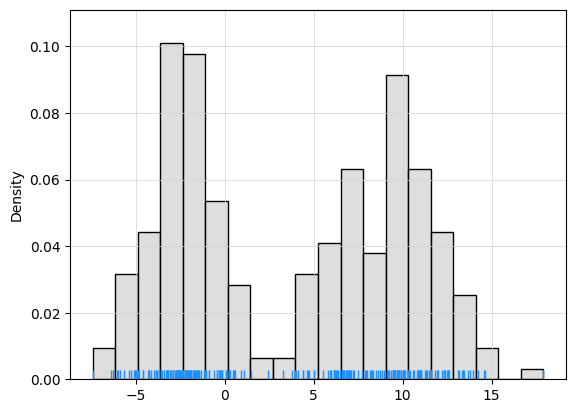

In [28]:
X_new = kde.sample(n_samples=250)

sns.histplot(X_new.ravel(), bins=20, stat="density", color="lightgrey")
sns.rugplot(X_new.ravel(), color="dodgerblue")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

In [29]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X)
gmm.predict(X)

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0])

In [30]:
gmm.predict_proba(X)

array([[9.99809500e-01, 1.90499762e-04],
       [1.73596228e-08, 9.99999983e-01],
       [9.98965880e-01, 1.03411986e-03],
       [6.62325206e-17, 1.00000000e+00],
       [9.99852179e-01, 1.47821159e-04],
       [9.99724537e-01, 2.75463373e-04],
       [9.99381880e-01, 6.18119575e-04],
       [9.58091584e-20, 1.00000000e+00],
       [9.99339166e-01, 6.60834258e-04],
       [9.99917508e-01, 8.24920374e-05],
       [9.99891846e-01, 1.08153593e-04],
       [5.53360855e-16, 1.00000000e+00],
       [9.99451681e-01, 5.48318613e-04],
       [7.11843495e-05, 9.99928816e-01],
       [1.59919153e-20, 1.00000000e+00],
       [9.90649918e-01, 9.35008175e-03],
       [9.99931282e-01, 6.87183059e-05],
       [3.96618005e-24, 1.00000000e+00],
       [9.25332260e-10, 9.99999999e-01],
       [5.19624097e-19, 1.00000000e+00],
       [9.99741450e-01, 2.58550106e-04],
       [9.99910574e-01, 8.94263241e-05],
       [9.99914546e-01, 8.54538402e-05],
       [9.99969032e-01, 3.09678056e-05],
       [9.681722

In [31]:
gmm._estimate_log_prob(X)

array([[  -1.26869862,   -9.84679292],
       [ -20.38619544,   -2.52950181],
       [  -1.51297646,   -8.3985716 ],
       [ -39.27823941,   -2.03730453],
       [  -1.29732827,  -10.12911304],
       [  -1.26618292,   -9.47538851],
       [  -1.37908791,   -8.77972343],
       [ -45.93686441,   -2.15736095],
       [  -1.39413066,   -8.72790231],
       [  -1.48228032,  -10.89743182],
       [  -1.37165501,  -10.51593024],
       [ -37.14140013,   -2.02330399],
       [  -1.35404083,   -8.8745716 ],
       [ -12.90998214,   -3.37224096],
       [ -47.77828516,   -2.20850672],
       [  -2.42798205,   -7.10338338],
       [  -1.58977102,  -11.18762244],
       [ -56.40591584,   -2.53410224],
       [ -23.13544846,   -2.34700542],
       [ -44.20469521,   -2.11593912],
       [  -1.26374999,   -9.53633766],
       [  -1.44392091,  -10.77835215],
       [  -1.46489545,  -10.84476941],
       [  -2.86872975,  -13.26368641],
       [ -29.74089695,   -2.0899558 ],
       [  -1.27969295,   

In [32]:
gmm.weights_

array([0.49689374, 0.50310626])

In [33]:
gmm.means_

array([[-2.62713984],
       [ 9.12611073]])

In [34]:
gmm.covariances_

array([[[1.98684369]],

       [[9.06906997]]])

In [35]:
np.sum(np.exp(gmm._estimate_log_prob(X)) * gmm.weights_, axis=1)

array([1.39751814e-01, 4.00969236e-02, 1.09555842e-01, 6.55948292e-02,
       1.35801704e-01, 1.40115738e-01, 1.25199267e-01, 5.81741127e-02,
       1.23335291e-01, 1.12863415e-01, 1.26068996e-01, 6.65196513e-02,
       1.28365779e-01, 1.72641420e-02, 5.52735607e-02, 4.42470283e-02,
       1.01359529e-01, 3.99128832e-02, 4.81247205e-02, 6.06343935e-02,
       1.40454669e-01, 1.17277711e-01, 1.14843026e-01, 2.82100252e-02,
       6.22305232e-02, 1.38243437e-01, 9.53118753e-02, 2.01676960e-02,
       6.59339421e-02, 1.38387039e-01, 6.45190784e-02, 8.58031424e-02,
       1.38735028e-01, 6.25119908e-02, 4.94245089e-02, 1.04555946e-01,
       3.63251095e-03, 4.64474776e-02, 1.32744190e-01, 1.15428756e-01,
       6.54627034e-02, 1.26854318e-02, 8.17309225e-02, 6.27602864e-02,
       9.39258346e-02, 3.87359653e-02, 5.26032109e-02, 9.18071528e-02,
       1.36484492e-01, 5.56268124e-02, 8.98702392e-02, 7.36913626e-03,
       1.78649143e-02, 1.40555908e-01, 1.39084118e-01, 1.28436619e-01,
      

In [36]:
np.exp(gmm.score_samples(X))

array([1.39751814e-01, 4.00969236e-02, 1.09555842e-01, 6.55948292e-02,
       1.35801704e-01, 1.40115738e-01, 1.25199267e-01, 5.81741127e-02,
       1.23335291e-01, 1.12863415e-01, 1.26068996e-01, 6.65196513e-02,
       1.28365779e-01, 1.72641420e-02, 5.52735607e-02, 4.42470283e-02,
       1.01359529e-01, 3.99128832e-02, 4.81247205e-02, 6.06343935e-02,
       1.40454669e-01, 1.17277711e-01, 1.14843026e-01, 2.82100252e-02,
       6.22305232e-02, 1.38243437e-01, 9.53118753e-02, 2.01676960e-02,
       6.59339421e-02, 1.38387039e-01, 6.45190784e-02, 8.58031424e-02,
       1.38735028e-01, 6.25119908e-02, 4.94245089e-02, 1.04555946e-01,
       3.63251095e-03, 4.64474776e-02, 1.32744190e-01, 1.15428756e-01,
       6.54627034e-02, 1.26854318e-02, 8.17309225e-02, 6.27602864e-02,
       9.39258346e-02, 3.87359653e-02, 5.26032109e-02, 9.18071528e-02,
       1.36484492e-01, 5.56268124e-02, 8.98702392e-02, 7.36913626e-03,
       1.78649143e-02, 1.40555908e-01, 1.39084118e-01, 1.28436619e-01,
      

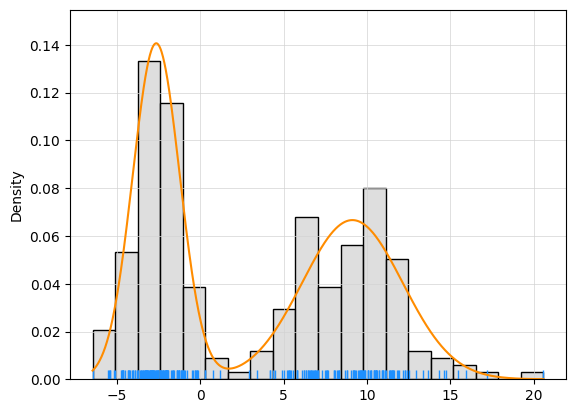

In [37]:
# get pdf values for the plot x values
x = np.linspace(X.min(), X.max(), 1000)
logprob = gmm.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)

# create plot
sns.histplot(X.ravel(), bins=20, stat="density", color="lightgrey")
sns.rugplot(X.ravel(), color="dodgerblue")
plt.plot(x, pdf, color="darkorange")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

In [38]:
gmm.sample(n_samples=10)

(array([[-6.02418707],
        [-1.65271969],
        [13.56770869],
        [ 9.73845102],
        [13.06924835],
        [ 2.35393077],
        [11.33214542],
        [12.21877108],
        [10.58135851],
        [ 6.36865802]]),
 array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1]))

In [39]:
X, _ = make_blobs(
    n_samples=500,
    n_features=2,
    cluster_std=[0.5, 2, 5],
    random_state=3,
)
X.shape

(500, 2)

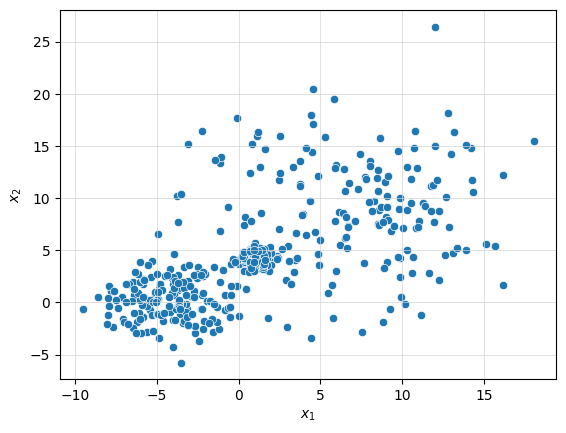

In [40]:
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

In [41]:
km3 = KMeans(n_clusters=3)
km3.fit(X)
clusters = km3.predict(X)

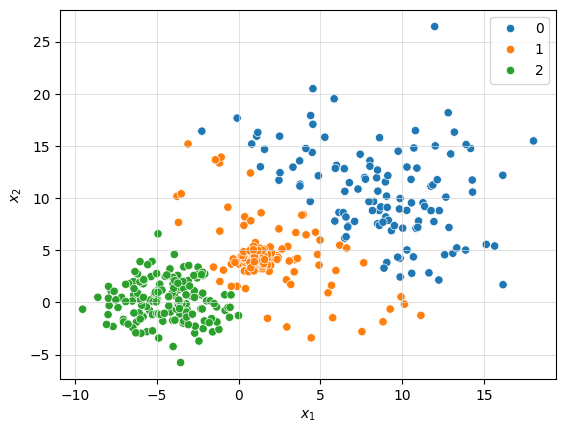

In [42]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pd.Categorical(clusters))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

In [43]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
clusters = gmm.predict(X)

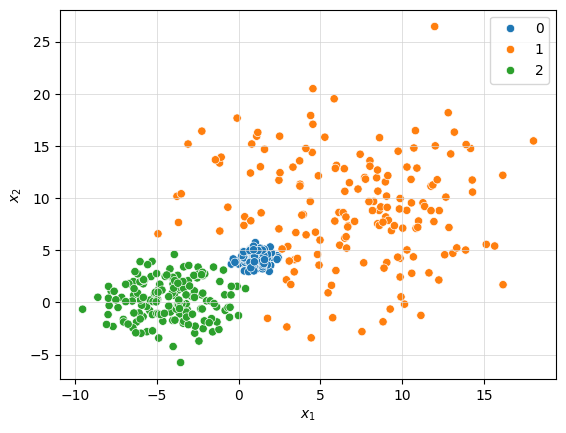

In [44]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pd.Categorical(clusters))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

## Outlier Detection

- [`sklearn` Novelty and Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html)
- [`sklearn` Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)


In [45]:
X, _ = make_blobs(
    n_samples=500,
    centers=3,
    n_features=2,
    cluster_std=1.5,
    random_state=42,
)
outliers = np.random.RandomState(42).uniform(
    low=-10,
    high=10,
    size=(25, 2),
)
X = np.vstack((X, outliers))
X

array([[-5.1557172 , -7.93487423],
       [ 0.59454887,  1.89172738],
       [ 7.92458324,  0.76072226],
       ...,
       [-4.82440037,  3.25044569],
       [-3.76577848,  0.40136042],
       [ 0.93420559, -6.30291089]])

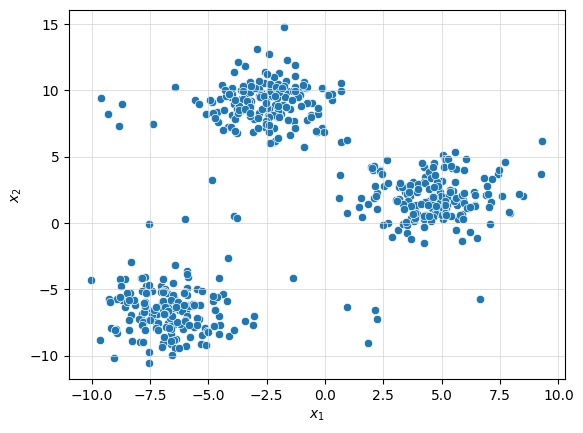

In [46]:
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

In [47]:
iso = IsolationForest()
_ = iso.fit(X)
inout = iso.predict(X)
inout

array([ 1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,
        1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1

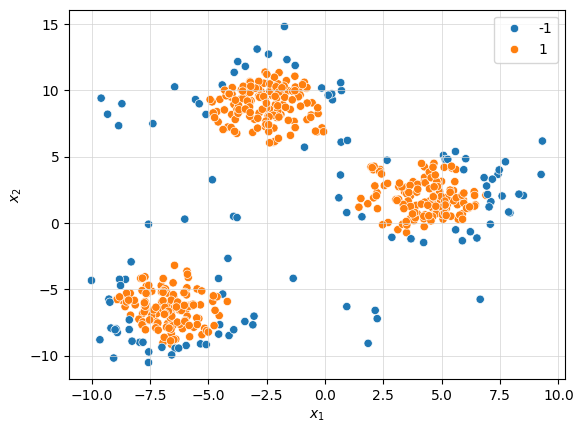

In [48]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pd.Categorical(inout))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()

In [49]:
iso = IsolationForest(contamination=0.05)
_ = iso.fit(X)
inout = iso.predict(X)
inout

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

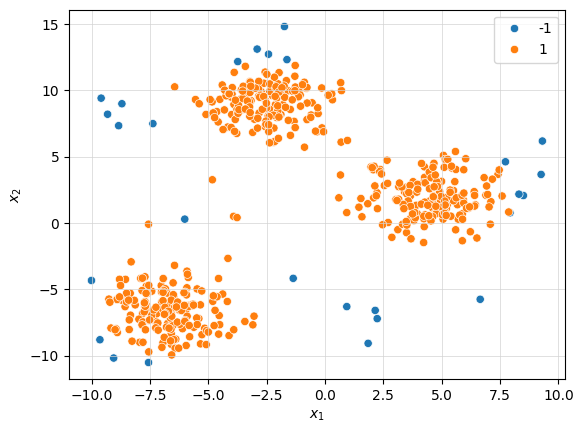

In [50]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pd.Categorical(inout))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.grid(color="lightgrey", linestyle="-", linewidth=0.5)
plt.show()